# Dataset
https://www.kaggle.com/datasets/zeyadkhalid/mbti-personality-types-500-dataset?select=MBTI+500.csv


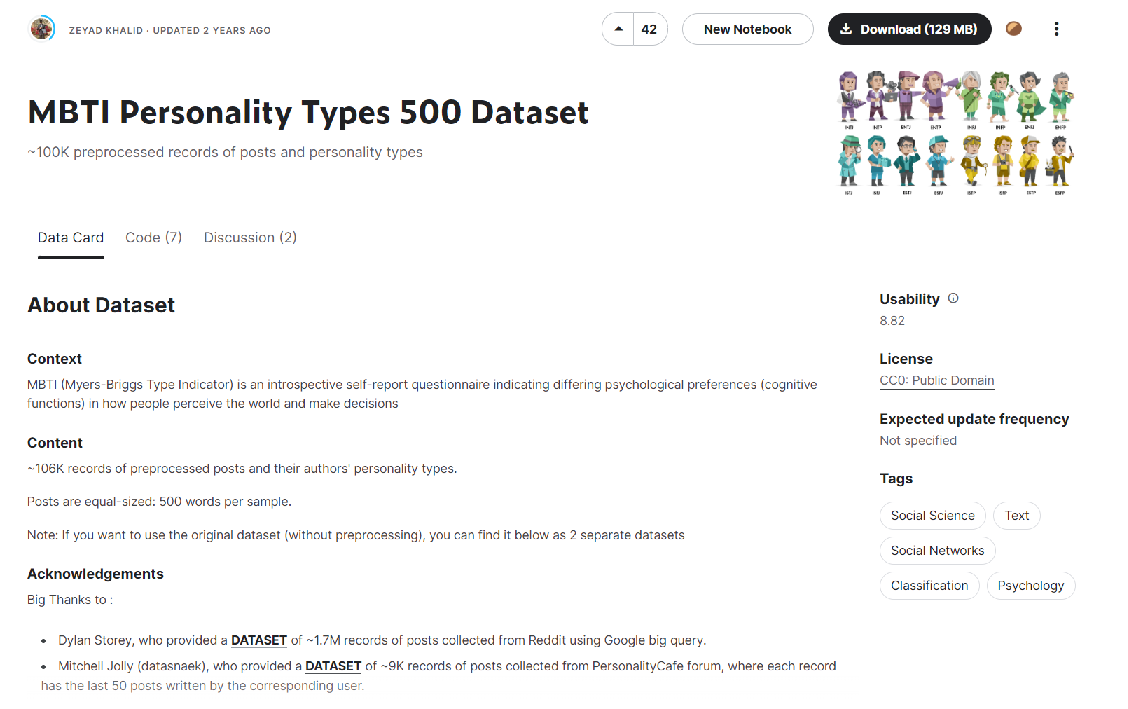

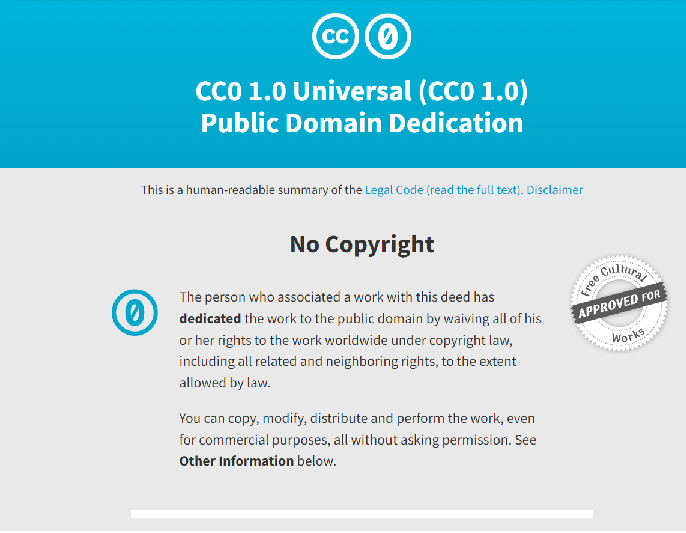

# Let's Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Embedding
from tensorflow.keras.models import Model

## What the dataset looks like

In [3]:
df = pd.read_csv('./Datasets/MBTI 500.csv')
df.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


### We need to create 4 Models:
* Introversion/Extroversion Classifier
* Sensing/Intuition Classifier
* Thinking/Feeling Classifier
* Judging/Perceiving Classifier

##### So we will have to create appropriate datasets using the given dataset.

In [4]:
df_I = df[df['type'].apply(lambda x : 'E' not in x)]
df_tbr = df_I.head(55287) # Difference between majority and minority types
IE_balanced_df = df[~df.index.isin(df_tbr.index)]
Idata = IE_balanced_df[IE_balanced_df['type'].apply(lambda x : 'E' not in x)]['posts'].nunique()
Edata = IE_balanced_df[IE_balanced_df['type'].apply(lambda x : 'E'  in x)]['posts'].nunique()
Idata,Edata

(25390, 25390)

#### We have also balanced the dataset to avoid any biased results.
### Similarly , we will do this for rest of the models

In [10]:

df_S = df[df['type'].apply(lambda x : 'S' not in x)]
df_tbr = df_S.head(87665) 
SN_balanced_df = df[~df.index.isin(df_tbr.index)]

df_T = df[df['type'].apply(lambda x : 'F' not in x)]
df_tbr = df_T.head(32339)
TF_balanced_df = df[~df.index.isin(df_tbr.index)]

df_P = df[df['type'].apply(lambda x : 'J' not in x)]
df_tbr = df_P.head(17197)
JP_balanced_df =df[~df.index.isin(df_tbr.index)]

In [11]:
Sdata = SN_balanced_df[SN_balanced_df['type'].apply(lambda x : 'N' not in x)]['posts'].nunique()
Ndata = SN_balanced_df[SN_balanced_df['type'].apply(lambda x : 'N'  in x)]['posts'].nunique()
Sdata,Ndata

(9201, 9201)

In [12]:
Tdata = TF_balanced_df[TF_balanced_df['type'].apply(lambda x : 'F' not in x)]['posts'].nunique()
Fdata = TF_balanced_df[TF_balanced_df['type'].apply(lambda x : 'F'  in x)]['posts'].nunique()
Tdata,Fdata

(36864, 36864)

In [14]:
Jdata = JP_balanced_df[JP_balanced_df['type'].apply(lambda x : 'P' not in x)]['posts'].nunique()
Pdata = JP_balanced_df[JP_balanced_df['type'].apply(lambda x : 'P'  in x)]['posts'].nunique()
Jdata,Pdata

(44435, 44435)

In [18]:
# Save the Datasets

# IE_balanced_df.to_csv('./Datasets/IE_Dataset.csv')
# SN_balanced_df.to_csv('./Datasets/SN_Dataset.csv')
# TF_balanced_df.to_csv('./Datasets/TF_Dataset.csv')
# JP_balanced_df.to_csv('./Datasets/JP_Dataset.csv')

print('Datasets saved!')

Datasets saved!


In [16]:
# Optional
del IE_balanced_df
del SN_balanced_df
del TF_balanced_df
del JP_balanced_df

## Now that our Datasets are created, let's process them for Machine Learning

In [27]:
testDf = pd.read_csv('./Datasets/MBTI 500.csv')
testDf.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


###### We need to create a target column that holds the value to be predicted

In [29]:
# This function can easily create target columns for the datasets
def createType(data,class_type):
    data = data[['posts','type']]
    data[str(class_type)] = data['type'].apply(lambda x : 1*(str(class_type) in x))
    return data.drop('type',axis=1)

## Now lets use this function to obtain our datasets

In [28]:
IE_df = createType(pd.read_csv('./Datasets/IE_Dataset.csv'),'I')
IE_df.tail()

,posts,I
50775,stay frustrate world life want take long nap w...,1
50776,fizzle around time mention sure mistake thing ...,1
50777,schedule modify hey w intp strong wing underst...,1
50778,enfj since january busy schedule able spend li...,1
50779,feel like men good problem tell parent want te...,1


In [31]:
SN_df = createType(pd.read_csv('./Datasets/SN_Dataset.csv'),'N')
SN_df.head()

,posts,N
0,like spring feel energetic season whatever rea...,0
1,ridiculous like stress angry think straight ge...,0
2,call muiple people bid save face slowly realiz...,0
3,talk etc end coworkers friend ask hang day rea...,0
4,ive try learn pick feel apart constantly like ...,0


In [32]:
TF_df = createType(pd.read_csv('./Datasets/TF_Dataset.csv'),'F')
TF_df.tail()

,posts,F
73723,stay frustrate world life want take long nap w...,1
73724,fizzle around time mention sure mistake thing ...,1
73725,schedule modify hey w intp strong wing underst...,1
73726,enfj since january busy schedule able spend li...,1
73727,feel like men good problem tell parent want te...,1


In [34]:
JP_df = createType(pd.read_csv('./Datasets/JP_Dataset.csv'),'P')
JP_df.head()

,posts,P
0,know intj tool use interaction people excuse a...,0
1,rap music ehh opp yeah know valid well know fa...,0
2,preferably p hd low except wew lad video p min...,0
3,drink like wish could drink red wine give head...,0
4,space program ah bad deal meing freelance max ...,0


### Now that we have obtained our datasets, lets see what the posts look like

In [36]:
testDf['posts'][150]

'like retard reason oppose use still think legal hey nice fan generalization rejection rejection accept one obligate like back obligate like anyone back long enough intp neither fix work around problem around point others open mind enough see think utopia possible long human exist nature tend towards chaos besides yet aware utopia bore stale conflict part make life interest christian think logical agnostic atheist people complain problem change anything solve complicate want spend minute write inception visionary succeed trouble time others fail outside universe time physic order want understand currently would choose flight fast perception reflex ability see trajectory cool though assume one admins site xstp great response give praise something usually think moment easy way keep people happy set lucky enough really positive upbeat producer pick leave know win always case career continue think woman cc look men fuck club marry husband entp ridiculous officially agree seriously date tes

#### Lets create a function that will preprocess the posts for all datasets as well as split it to training and testing sets

In [100]:

MAX_VOCAB = 20000 # Max number of words to be considered in our vocabolary

def customPreProcess(dataset,target):
    
    #SPLIT DATASET
    df_train,df_test,y_train,y_test = train_test_split(dataset['posts'],dataset[str(target)],test_size=0.3,random_state=200)
    
    #TOKENIZE POSTS
    tokenizer = Tokenizer(num_words=MAX_VOCAB)
    tokenizer.fit_on_texts(df_train)
    tok_train = tokenizer.texts_to_sequences(df_train)
    tok_test = tokenizer.texts_to_sequences(df_test)
    V = len(tokenizer.word_index)
    
    #PADDING POSTS
    pad_train = pad_sequences(tok_train)
    T = pad_train.shape[1]
    pad_test = pad_sequences(tok_test,maxlen=T)
    
    return pad_train,pad_test,y_train,y_test,T,V,tokenizer

#### Let's use this function to preprocess posts of all datasets

In [101]:
I_Xtrain , I_Xtest , I_ytrain , I_ytest , I_T , I_V , I_tokenizer = customPreProcess(IE_df,'I')
N_Xtrain , N_Xtest , N_ytrain , N_ytest , N_T , N_V , N_tokenizer = customPreProcess(SN_df,'N')
F_Xtrain , F_Xtest , F_ytrain , F_ytest , F_T , F_V , F_tokenizer = customPreProcess(TF_df,'F')
P_Xtrain , P_Xtest , P_ytrain , P_ytest , P_T , P_V , P_tokenizer = customPreProcess(JP_df,'P')

## Creating the Model using Tensorflow

In [76]:
def CNN(X_train,X_test,y_train,y_test,T,V):
    
    #Layers
    i = Input(shape=(T,))
    x = Embedding(V+1,20)(i)
    x = Conv1D(32,3,activation='relu')(x)
    x = MaxPooling1D(3)(x)
    x = Conv1D(64,3,activation='relu')(x)
    x = MaxPooling1D(3)(x)
    x = Conv1D(128,3,activation='relu')(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(1,activation='sigmoid')(x)
    
    model = Model(i,x)
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    
    r = model.fit(
        X_train,
        y_train,
        epochs=10,
        validation_data=(X_test,y_test)
    )
    
    return model,r

## Training and Validation

In [77]:
IE_CNN,I_report = CNN(I_Xtrain,I_Xtest,I_ytrain,I_ytest,I_T,I_V)

Epoch 1/10
1111/1111 [==============================] - 55s 48ms/step - loss: 0.3877 - accuracy: 0.8085 - val_loss: 0.2629 - val_accuracy: 0.8923
Epoch 2/10
1111/1111 [==============================] - 54s 49ms/step - loss: 0.1898 - accuracy: 0.9257 - val_loss: 0.2628 - val_accuracy: 0.8914
Epoch 3/10
1111/1111 [==============================] - 54s 49ms/step - loss: 0.0976 - accuracy: 0.9657 - val_loss: 0.2684 - val_accuracy: 0.9006
Epoch 4/10
1111/1111 [==============================] - 53s 48ms/step - loss: 0.0416 - accuracy: 0.9866 - val_loss: 0.3846 - val_accuracy: 0.8972
Epoch 5/10
1111/1111 [==============================] - 52s 47ms/step - loss: 0.0227 - accuracy: 0.9923 - val_loss: 0.4538 - val_accuracy: 0.8965
Epoch 6/10
1111/1111 [==============================] - 53s 48ms/step - loss: 0.0153 - accuracy: 0.9946 - val_loss: 0.5127 - val_accuracy: 0.8985
Epoch 7/10
1111/1111 [==============================] - 53s 47ms/step - loss: 0.0145 - accuracy: 0.9947 - val_loss: 0.5523 -

In [78]:
SN_CNN,N_report = CNN(N_Xtrain,N_Xtest,N_ytrain,N_ytest,N_T,N_V)

Epoch 1/10
403/403 [==============================] - 18s 41ms/step - loss: 0.3916 - accuracy: 0.7938 - val_loss: 0.2338 - val_accuracy: 0.9035
Epoch 2/10
403/403 [==============================] - 17s 41ms/step - loss: 0.1504 - accuracy: 0.9419 - val_loss: 0.2238 - val_accuracy: 0.9094
Epoch 3/10
403/403 [==============================] - 17s 42ms/step - loss: 0.0506 - accuracy: 0.9842 - val_loss: 0.2963 - val_accuracy: 0.9036
Epoch 4/10
403/403 [==============================] - 16s 40ms/step - loss: 0.0122 - accuracy: 0.9968 - val_loss: 0.4012 - val_accuracy: 0.8997
Epoch 5/10
403/403 [==============================] - 17s 43ms/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 0.3901 - val_accuracy: 0.9131
Epoch 6/10
403/403 [==============================] - 16s 41ms/step - loss: 2.8008e-04 - accuracy: 1.0000 - val_loss: 0.4104 - val_accuracy: 0.9132
Epoch 7/10
403/403 [==============================] - 16s 41ms/step - loss: 1.4376e-04 - accuracy: 1.0000 - val_loss: 0.4260 - val_a

In [79]:
TF_CNN,F_report = CNN(F_Xtrain,F_Xtest,F_ytrain,F_ytest,F_T,F_V)

Epoch 1/10
1613/1613 [==============================] - 87s 53ms/step - loss: 0.3659 - accuracy: 0.8159 - val_loss: 0.2237 - val_accuracy: 0.9141
Epoch 2/10
1613/1613 [==============================] - 88s 55ms/step - loss: 0.1692 - accuracy: 0.9362 - val_loss: 0.2081 - val_accuracy: 0.9198
Epoch 3/10
1613/1613 [==============================] - 92s 57ms/step - loss: 0.0941 - accuracy: 0.9657 - val_loss: 0.2261 - val_accuracy: 0.9189
Epoch 4/10
1613/1613 [==============================] - 87s 54ms/step - loss: 0.0437 - accuracy: 0.9854 - val_loss: 0.2999 - val_accuracy: 0.9142
Epoch 5/10
1613/1613 [==============================] - 88s 55ms/step - loss: 0.0242 - accuracy: 0.9920 - val_loss: 0.4066 - val_accuracy: 0.9098
Epoch 6/10
1613/1613 [==============================] - 94s 59ms/step - loss: 0.0172 - accuracy: 0.9939 - val_loss: 0.4168 - val_accuracy: 0.9147
Epoch 7/10
1613/1613 [==============================] - 94s 58ms/step - loss: 0.0144 - accuracy: 0.9949 - val_loss: 0.5999 -

In [80]:
JP_CNN,P_report = CNN(P_Xtrain,P_Xtest,P_ytrain,P_ytest,P_T,P_V)

Epoch 1/10
1945/1945 [==============================] - 113s 57ms/step - loss: 0.4698 - accuracy: 0.7400 - val_loss: 0.3158 - val_accuracy: 0.8659
Epoch 2/10
1945/1945 [==============================] - 115s 59ms/step - loss: 0.2674 - accuracy: 0.8896 - val_loss: 0.3131 - val_accuracy: 0.8705
Epoch 3/10
1945/1945 [==============================] - 109s 56ms/step - loss: 0.1809 - accuracy: 0.9289 - val_loss: 0.3247 - val_accuracy: 0.8712
Epoch 4/10
1945/1945 [==============================] - 113s 58ms/step - loss: 0.1053 - accuracy: 0.9624 - val_loss: 0.4651 - val_accuracy: 0.8490
Epoch 5/10
1945/1945 [==============================] - 107s 55ms/step - loss: 0.0572 - accuracy: 0.9808 - val_loss: 0.6016 - val_accuracy: 0.8428
Epoch 6/10
1945/1945 [==============================] - 107s 55ms/step - loss: 0.0329 - accuracy: 0.9887 - val_loss: 0.6694 - val_accuracy: 0.8583
Epoch 7/10
1945/1945 [==============================] - 117s 60ms/step - loss: 0.0259 - accuracy: 0.9910 - val_loss: 0

## Let's see how our models performed

In [81]:
def showReport(report):
    plt.plot(report.history['loss'],label='loss')
    plt.plot(report.history['val_loss'],label='val_loss')
    plt.legend()
    
    plt.plot(report.history['accuracy'],label='accuracy')
    plt.plot(report.history['val_accuracy'],label='val_accuracy')
    plt.legend()

### Report for Introversion/Extroversion Model

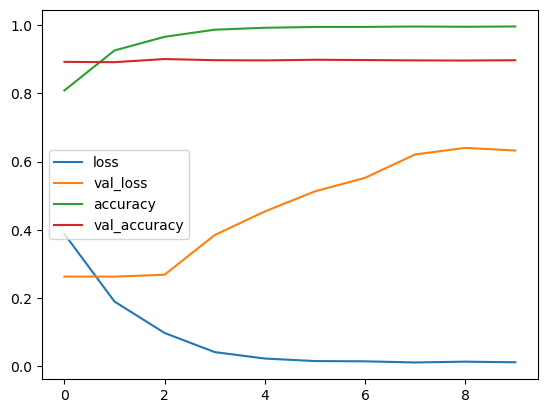

In [82]:
showReport(I_report)

### Report for Sensing/Intution Model

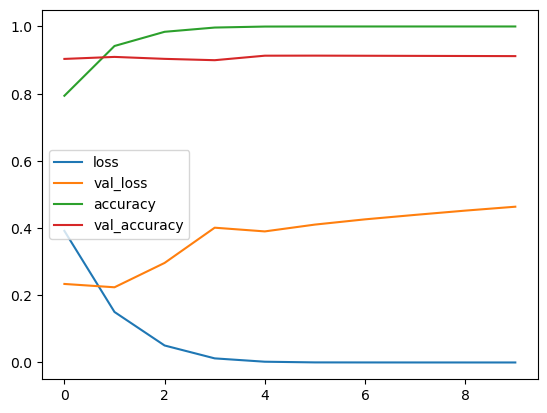

In [83]:
showReportReport(N_report)

### Report for Thinking/Feeling Model

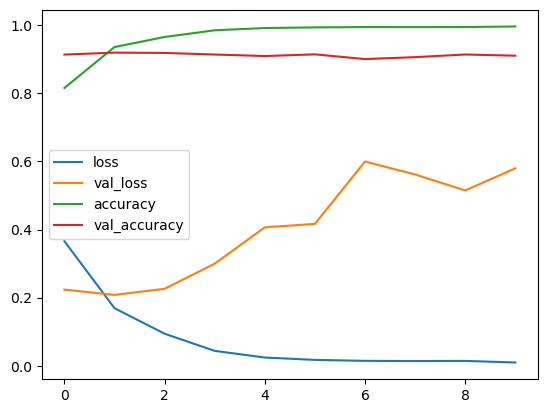

In [84]:
showReport(F_report)

### Report for Judging/Perceiving Model

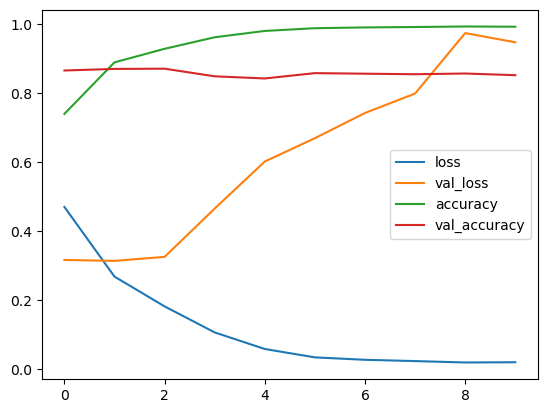

In [85]:
showReport(P_report)

# SUMMARY

### The Models we created using CNN are very accurate in predicting the Personality 
## Now we will save the model for future use in our backend API

In [104]:
# IE_CNN.save('./CNN_Models/IE_CNN.h5')
# SN_CNN.save('./CNN_Models/SN_CNN.h5')
# TF_CNN.save('./CNN_Models/TF_CNN.h5')
# JP_CNN.save('./CNN_Models/JP_CNN.h5')

print('Models saved to CNN_Models Directory')

# IE = [I_T,I_V,I_tokenizer]
# SN = [N_T,N_V,N_tokenizer]
# TF = [F_T,F_V,F_tokenizer]
# JP = [P_T,P_V,P_tokenizer]
# Additional = [IE,SN,TF,JP]
# with open('./CNN_Models/Additional.pickle','wb') as file:
#     pickle.dump(Additional,file)
    
print('Additional Info Saved!')

Models saved to CNN_Models Directory
Additional Info Saved!


### Additional Information about CNN Layers

In [90]:
IE_CNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 525)]             0         
                                                                 
 embedding (Embedding)       (None, 525, 20)           2865480   
                                                                 
 conv1d (Conv1D)             (None, 523, 32)           1952      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 174, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 172, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 57, 64)           0         
 1D)                                                         

In [91]:
SN_CNN.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 524)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 524, 20)           1786380   
                                                                 
 conv1d_3 (Conv1D)           (None, 522, 32)           1952      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 174, 32)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 172, 64)           6208      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 57, 64)           0         
 1D)                                                       

In [92]:
TF_CNN.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 525)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 525, 20)           3521460   
                                                                 
 conv1d_6 (Conv1D)           (None, 523, 32)           1952      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 174, 32)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 172, 64)           6208      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 57, 64)           0         
 1D)                                                       

In [94]:
JP_CNN.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 525)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 525, 20)           3818200   
                                                                 
 conv1d_9 (Conv1D)           (None, 523, 32)           1952      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 174, 32)          0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 172, 64)           6208      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 57, 64)           0         
 1D)                                                       

## Let's use a sample post to check the working of model

In [99]:
post,target = testDf['posts'][0],testDf['type'][0]
post[:500],target
# Suppose we have received a set of posts fetched from Twitter in a single string

('know intj tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad intj u stand look like line safeway watch people home talk people like think military job people volun',
 'INTJ')

#### We need to create a pipeline that takes the string and predicts the personality

In [27]:

def predict_personality(tweet):
    inp = []
    inp.append(tweet)
    tweet = inp[:]
    # Fetch Additional Info about the Models such as Tokenizers,etc..
    with open('./CNN_Models/Additional.pickle','rb') as file:
        toks = pickle.load(file)
        I_tok = toks[0]
        N_tok = toks[1]
        F_tok = toks[2]
        P_tok = toks[3]
        
    # Convert tweet into sequence
    I_post = I_tok[2].texts_to_sequences(tweet)
    N_post = N_tok[2].texts_to_sequences(tweet)
    F_post = F_tok[2].texts_to_sequences(tweet)
    P_post = P_tok[2].texts_to_sequences(tweet)
    
    # Pad the Sequences according to max length T
    I_post = pad_sequences(I_post,maxlen=I_tok[0])
    N_post = pad_sequences(N_post,maxlen=N_tok[0])
    F_post = pad_sequences(F_post,maxlen=F_tok[0])
    P_post = pad_sequences(P_post,maxlen=P_tok[0])
    
    # Load the Models
    IE_Model = load_model('./CNN_Models/IE_CNN.h5')
    SN_Model = load_model('./CNN_Models/SN_CNN.h5')
    TF_Model = load_model('./CNN_Models/TF_CNN.h5')
    JP_Model = load_model('./CNN_Models/JP_CNN.h5')
    
    # Predict Personality
    pi = IE_Model.predict(I_post,verbose=0)
    pn = SN_Model.predict(N_post,verbose=0)
    pf = TF_Model.predict(F_post,verbose=0)
    pp = JP_Model.predict(P_post,verbose=0)
    
    # Provide Results
    
    mbti = ''
    intro = int(round(pi[0][0],1)*100)
    intuit = int(round(pn[0][0],1)*100)
    feel = int(round(pf[0][0],1)*100)
    percep = int(round(pp[0][0],1)*100)
    if intro >= 0.5:
        mbti+='I'
    else:
        mbti+='E'
    if intuit >= 0.5:
        mbti+='N'
    else:
        mbti+='S'
    if feel >= 0.5:
        mbti+='F'
    else:
        mbti+='T'
    if percep >= 0.5:
        mbti+='P'
    else:
        mbti+='J'
    details = f''' {intro}% Introvert \n {100 -(intro)}% Extrovert
                    \n {intuit}% Intutive \n {100 -(intuit)}% Sensing
                    \n {feel}% Feeler \n {100 -(feel)}% Thinker
                    \n {percep}% Perceptive \n {100 -(percep)}% Judging
                '''
    result = {'Personality':mbti,'Details':details}
    return result

In [28]:
print(predict_personality('sdgh wrg rgwj egwejg  wegiojw egowie goiwje gq'))

{'Personality': 'INFP', 'Details': ' 40% Introvert \n 60% Extrovert\n                    \n 50% Intutive \n 50% Sensing\n                    \n 10% Feeler \n 90% Thinker\n                    \n 50% Perceptive \n 50% Judging\n                '}


### Now we can easily create a FLASK API using this pipeline